In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style='whitegrid', palette='muted', font_scale=1.1)

In [9]:
# =====================================================
# 1. Load All Raw Datasets from /data/raw
# =====================================================
RAW_DIR = Path('../data/raw')

# Automatically detect and read all Excel/CSV files
files = list(RAW_DIR.glob('*.xlsx')) + list(RAW_DIR.glob('*.csv'))
if not files:
    raise FileNotFoundError(f"No dataset files found in {RAW_DIR}")

dfs = []
for file in files:
    print(f"📂 Loading: {file.name}")
    if file.suffix == '.xlsx':
        df = pd.read_excel(file)
    else:
        df = pd.read_csv(file)
    dfs.append(df)

# Combine all datasets
df = pd.concat(dfs, ignore_index=True)
print(f'✅ Combined dataset shape: {df.shape}')

📂 Loading: Smart_Fertilizer_Recommender_Dataset.xlsx
📂 Loading: Crop and fertilizer dataset (1).csv
📂 Loading: dataset1.csv
📂 Loading: Fertilizer Prediction.csv
📂 Loading: fertilizer_dataset_2000.csv
📂 Loading: fertilizer_dataset_5000.csv
📂 Loading: fertilizer_recommendation_dataset.csv
✅ Combined dataset shape: (16592, 49)



Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Crop_Type,8000,10,Potato,849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,8000,11,Maharashtra,1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soil_Type,8000,5,Peaty,1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soil_pH,8000.0,NaN,NaN,NaN,6.659681,0.671611,4.5,6.16,6.67,7.17,8.49
Nitrogen_Level,8000.0,NaN,NaN,NaN,138.097854,30.432574,50.13,118.9975,138.275,156.26,249.91
Phosphorus_Level,8000.0,NaN,NaN,NaN,42.388681,13.655738,10.0,33.2975,41.12,48.9425,99.8
Potassium_Level,8000.0,NaN,NaN,NaN,126.900885,36.394004,51.55,104.9,122.5,139.2,299.84
Organic_Carbon,8000.0,NaN,NaN,NaN,1.267036,0.347933,0.2,1.05,1.29,1.51,2.0
Moisture_Content,8000.0,NaN,NaN,NaN,28.999043,7.728815,5.01,23.43,29.24,35.39,45.0
Rainfall_mm,8000.0,NaN,NaN,NaN,755.29578,250.537507,100.22,587.765,733.525,895.895,1499.45



Missing Values per Column:
Crop_Type                            8592
Region                               8592
Soil_Type                            8592
Soil_pH                              8592
Nitrogen_Level                       8592
Phosphorus_Level                     8592
Potassium_Level                      8592
Organic_Carbon                       8592
Moisture_Content                     8592
Rainfall_mm                          8592
Temperature_C                        8592
Plant_Age_Weeks                      8592
Fertilizer_Type                      8592
Recommended_Quantity_kg_per_acre     8592
Application_Timing                   8592
District_Name                       12079
Soil_color                          12079
Nitrogen                             8880
Phosphorus                          12079
Potassium                            8880
pH                                  11199
Rainfall                             8979
Temperature                          8979
Crop  

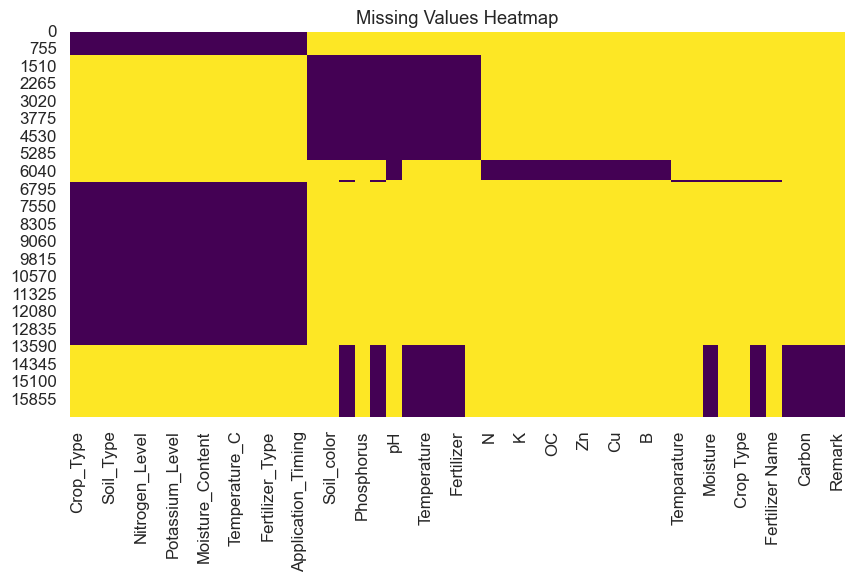

In [10]:
# =====================================================
# 2. Basic Summary
# =====================================================
print('\nSummary Statistics:')
display(df.describe(include='all').transpose())

# =====================================================
# 3. Missing Values
# =====================================================
missing = df.isnull().sum()
print('\nMissing Values per Column:')
print(missing[missing > 0])

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

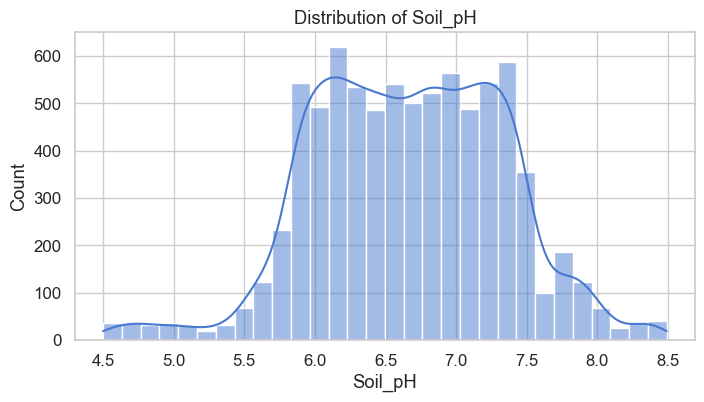

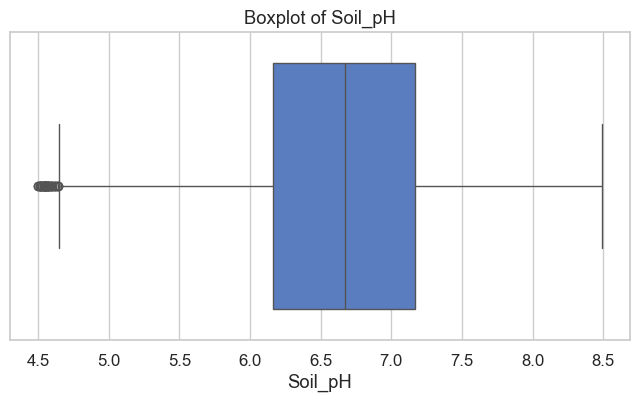

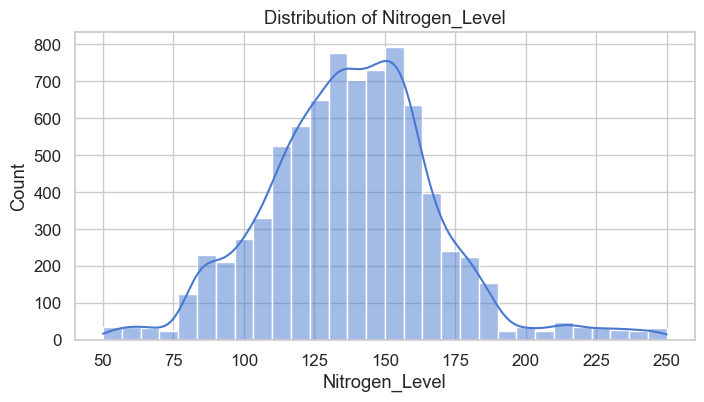

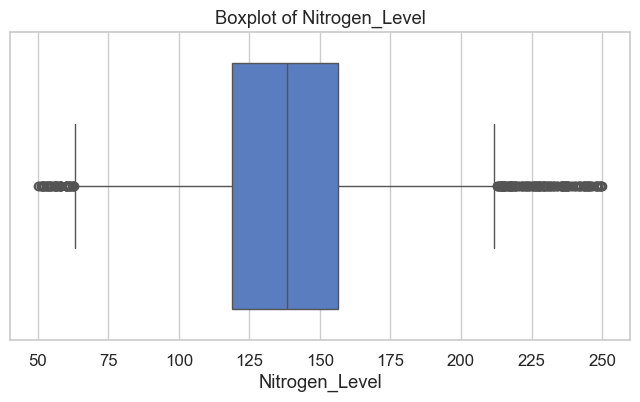

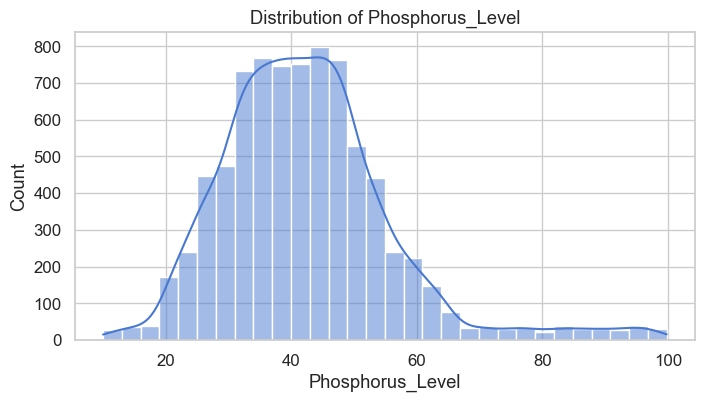

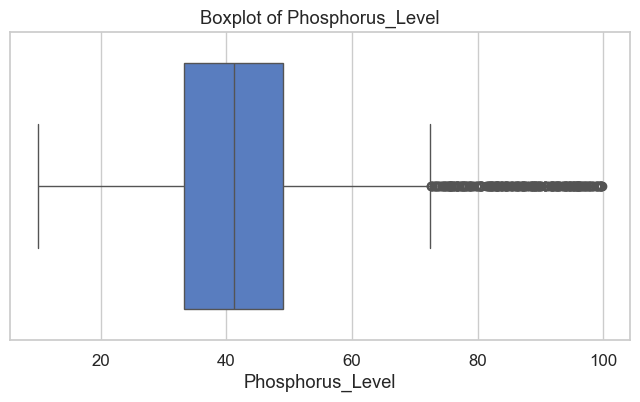

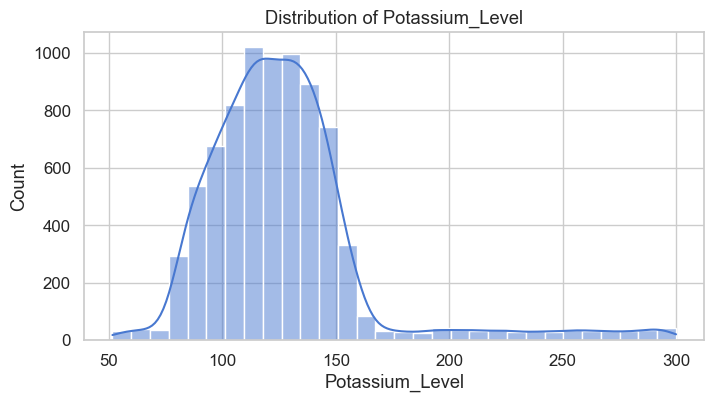

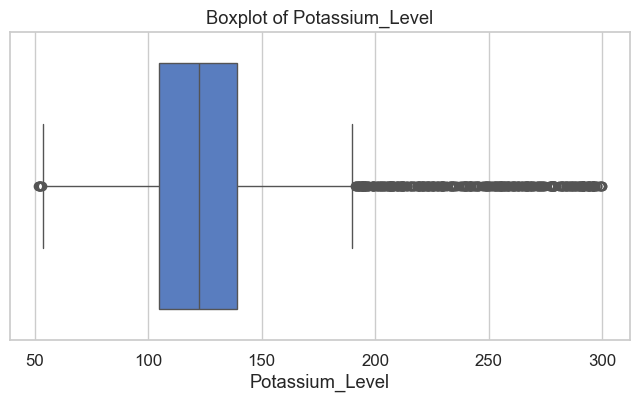

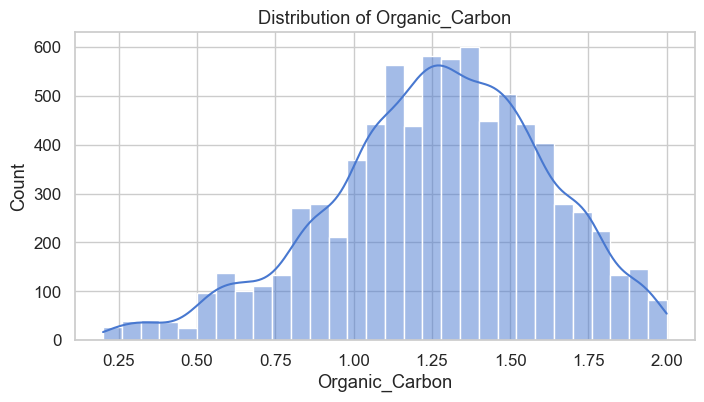

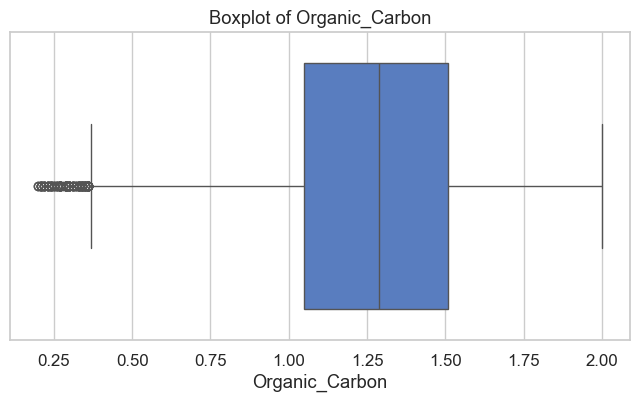

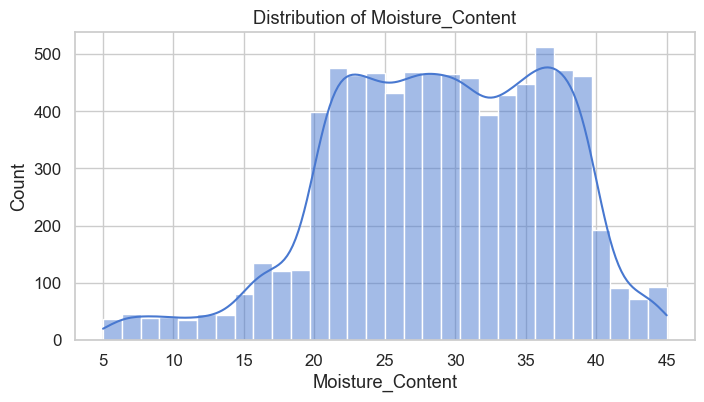

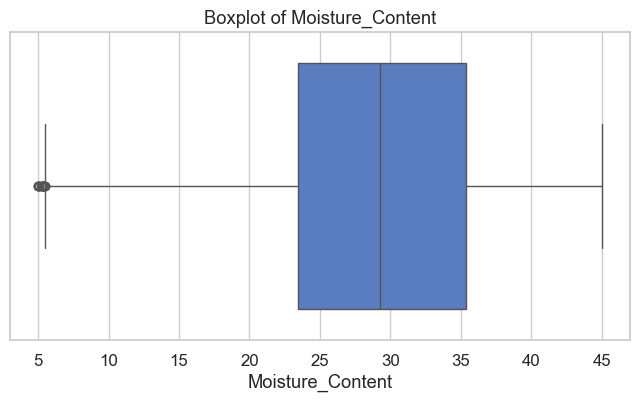

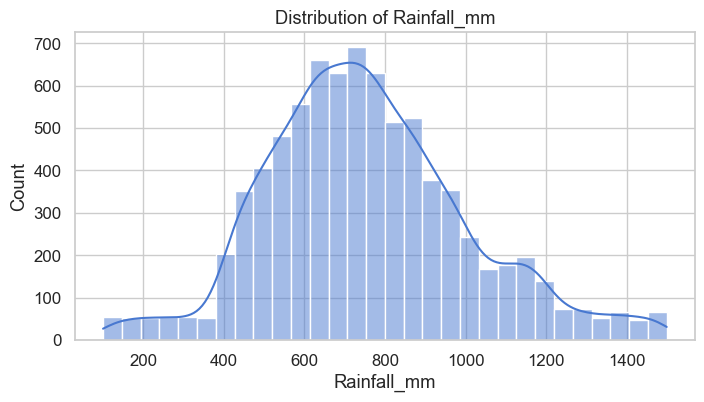

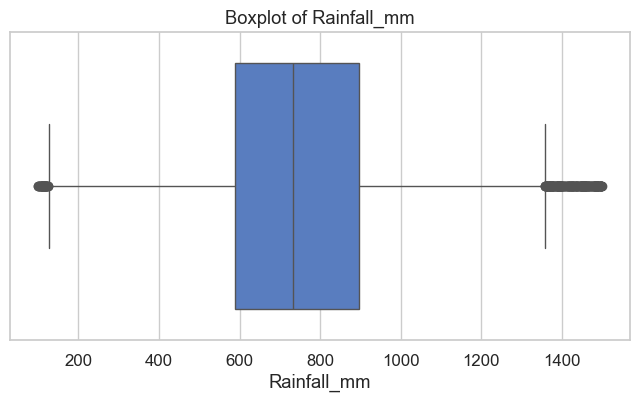

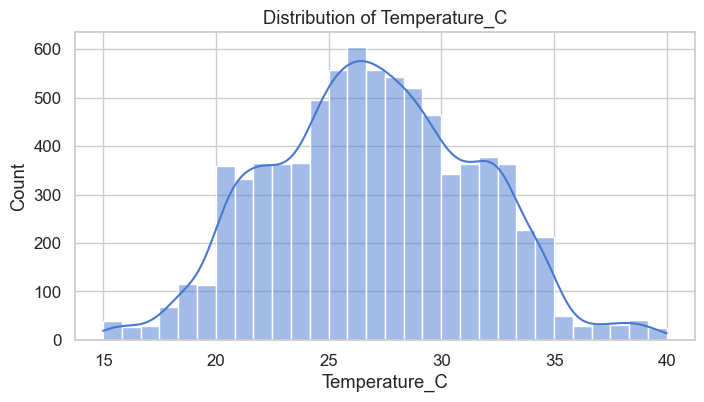

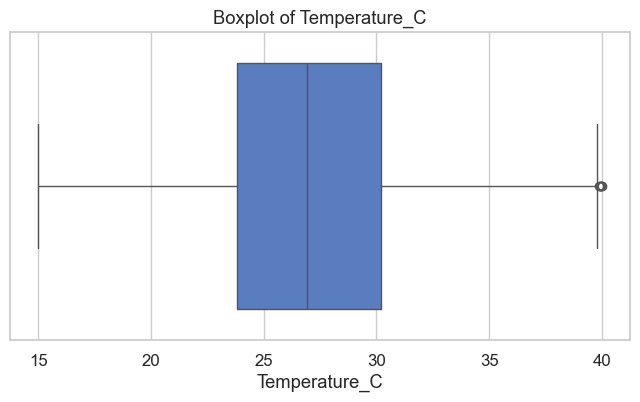

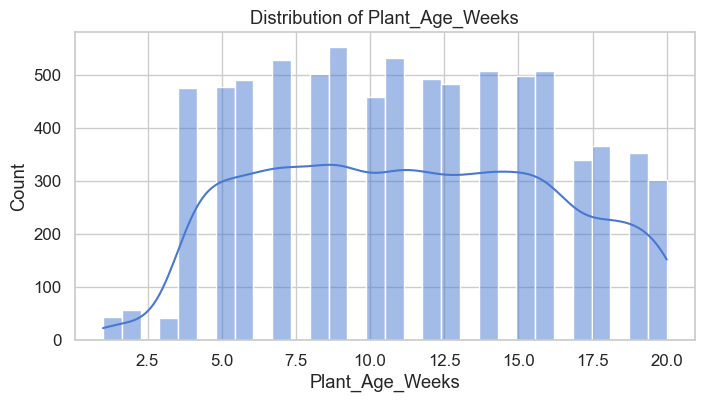

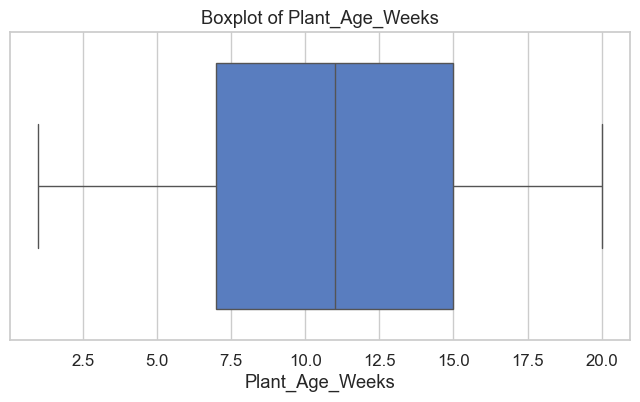

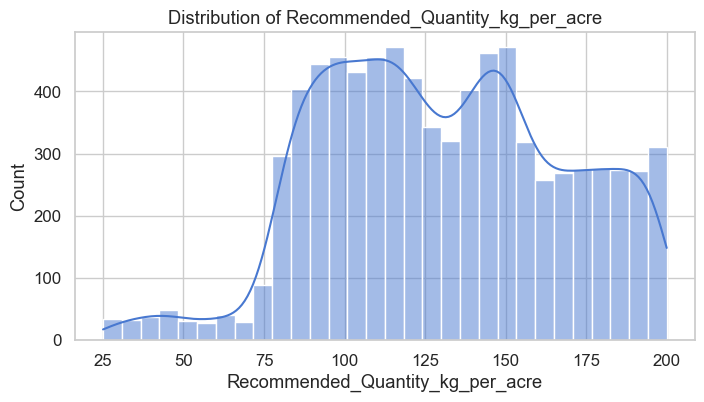

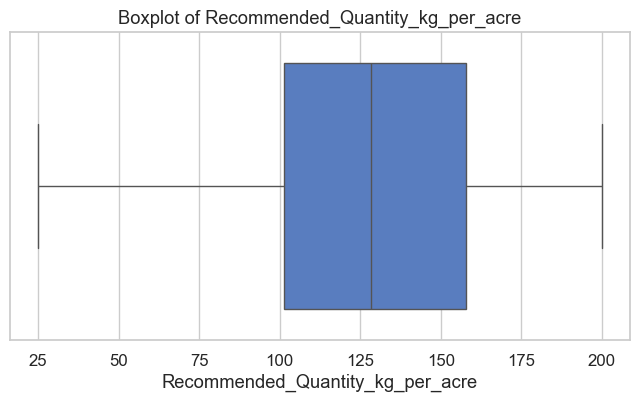

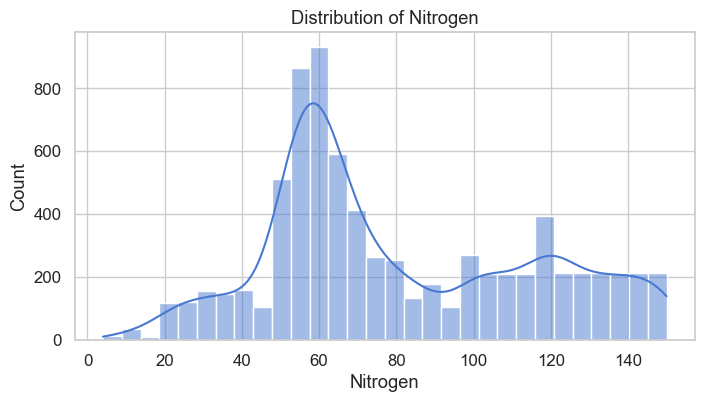

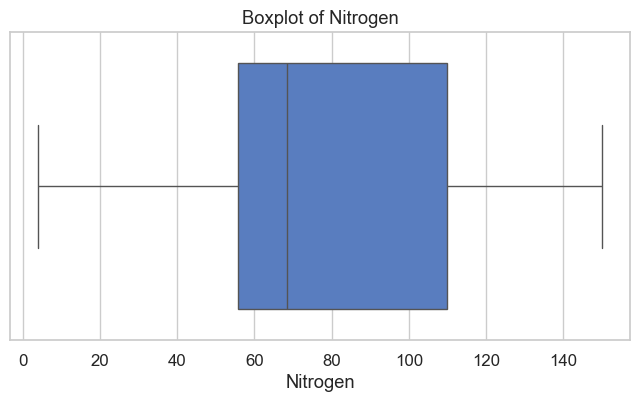

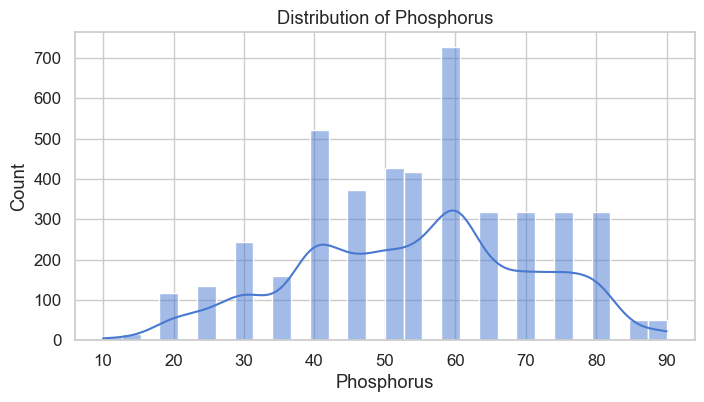

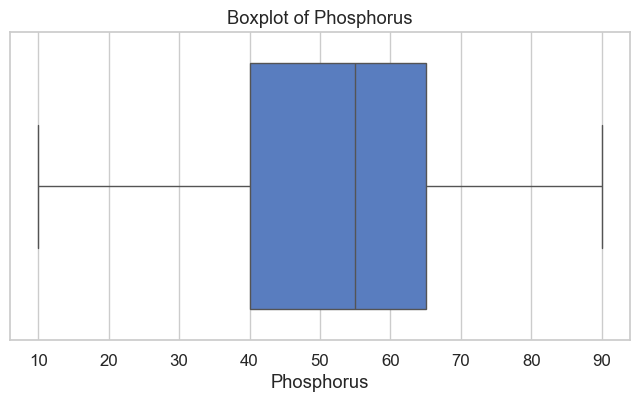

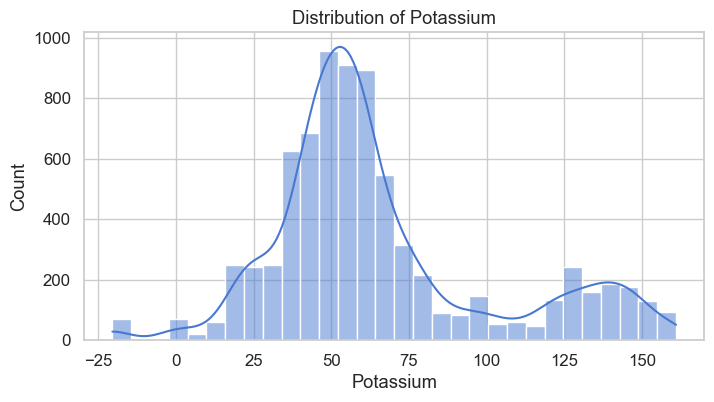

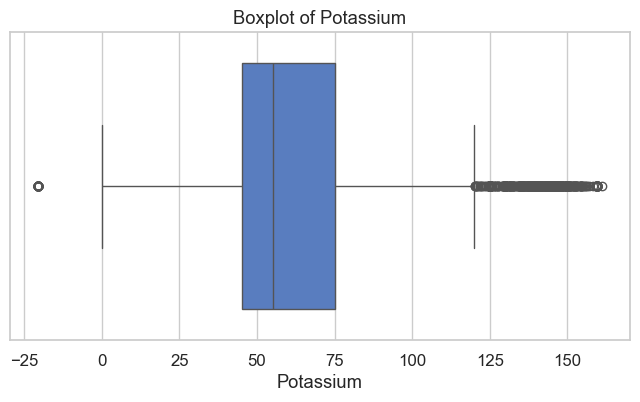

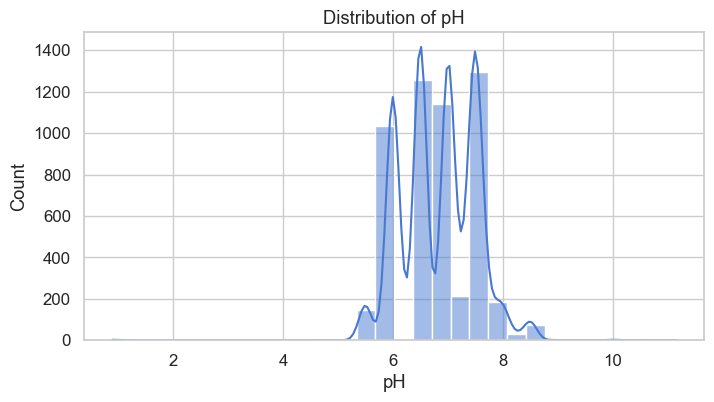

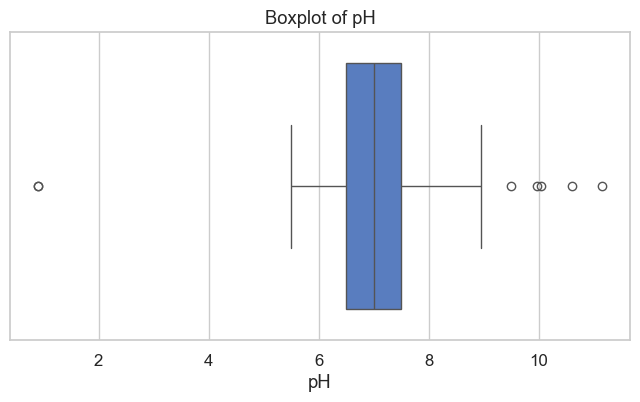

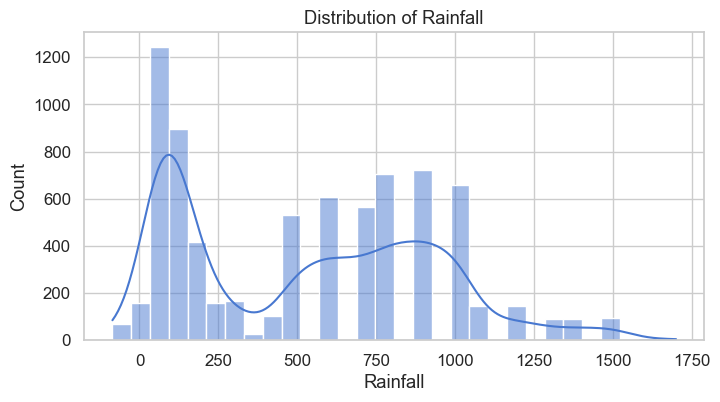

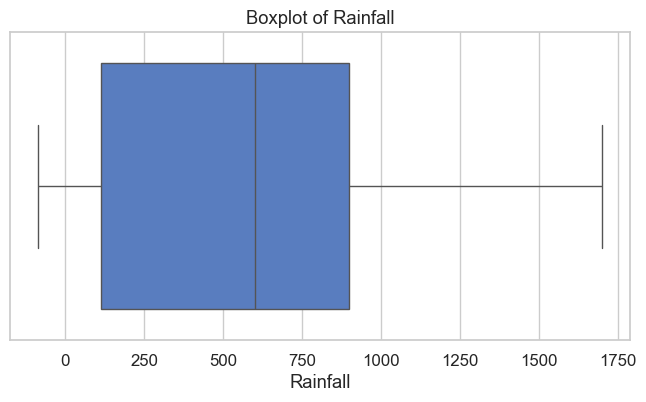

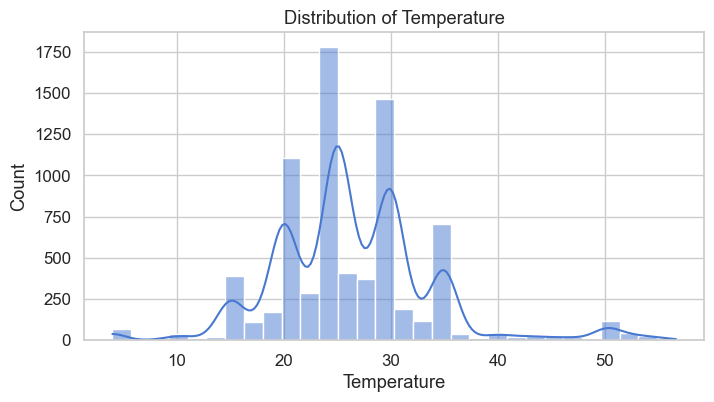

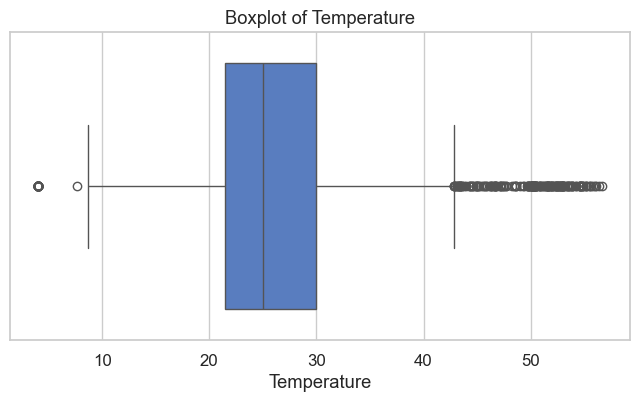

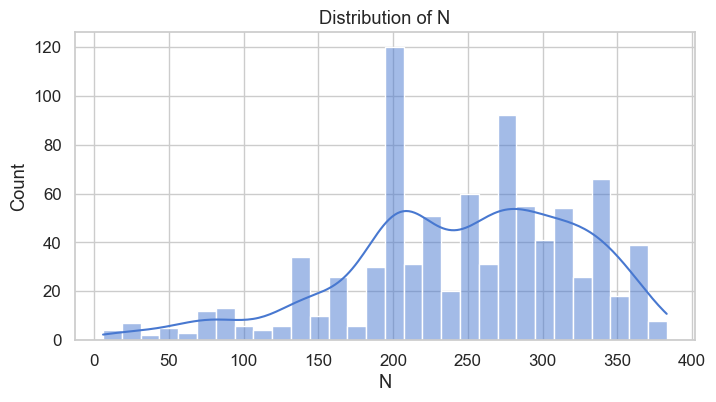

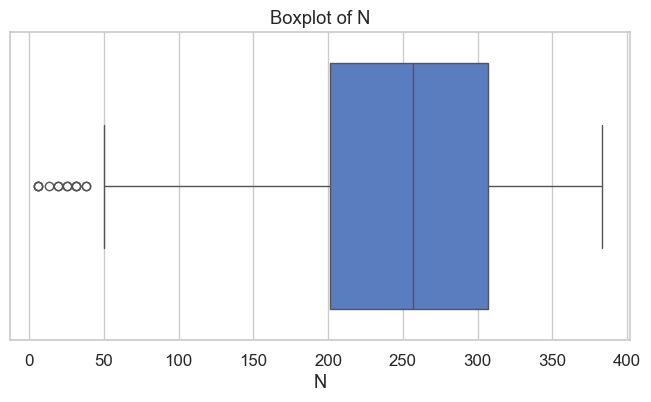

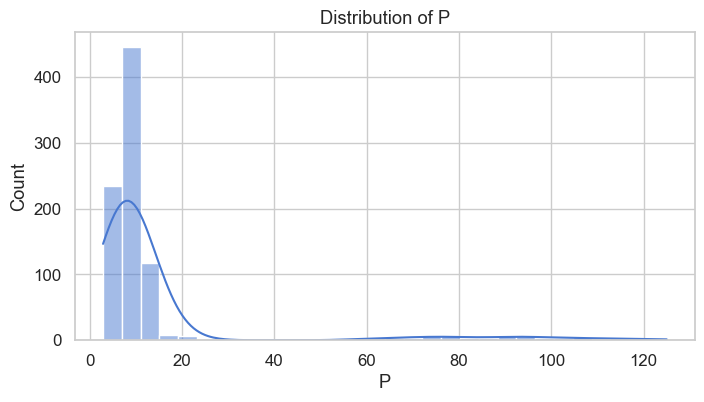

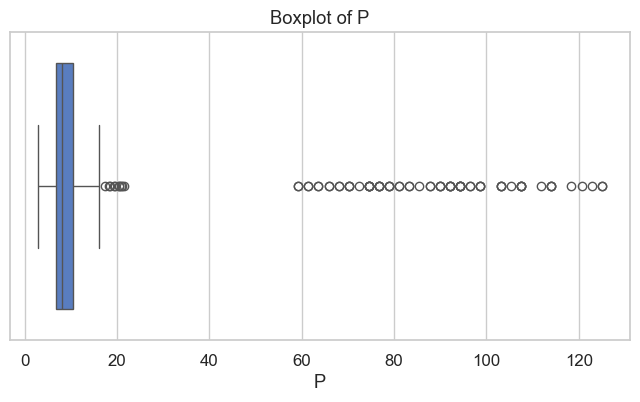

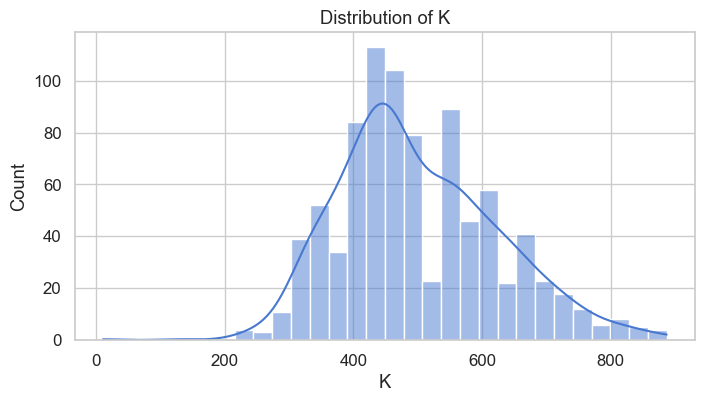

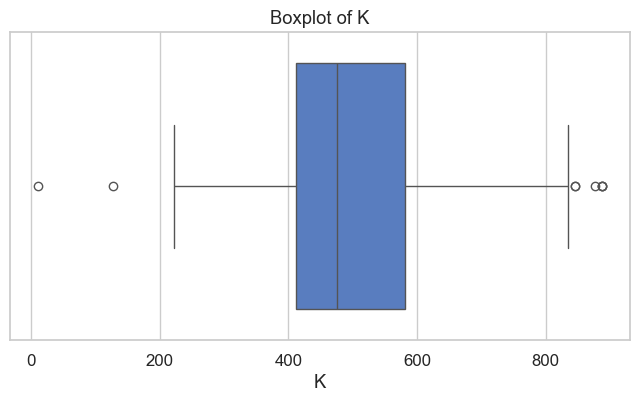

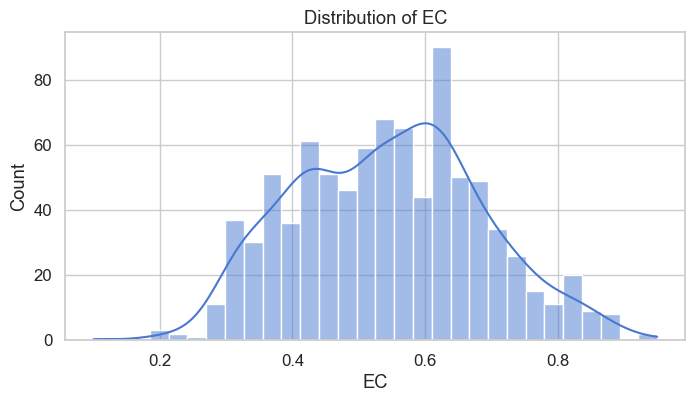

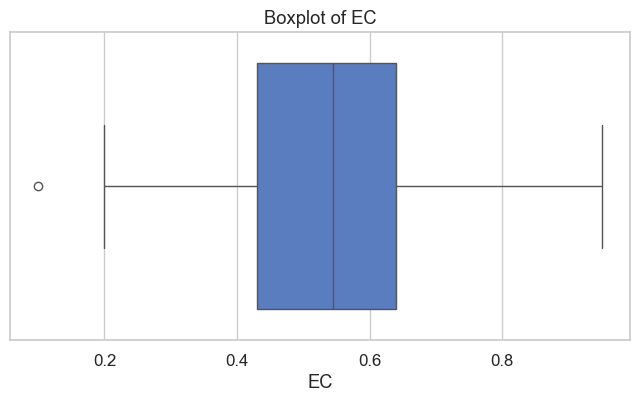

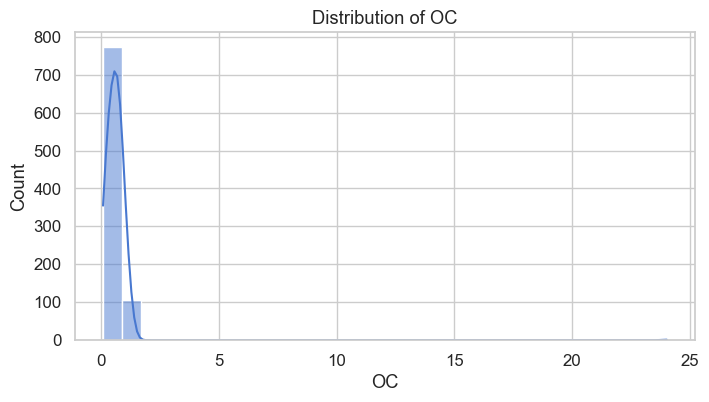

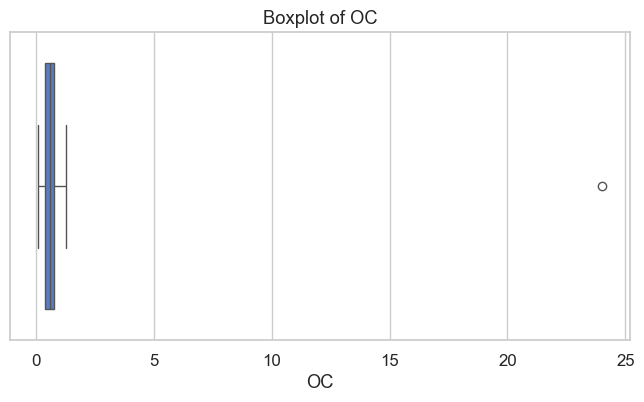

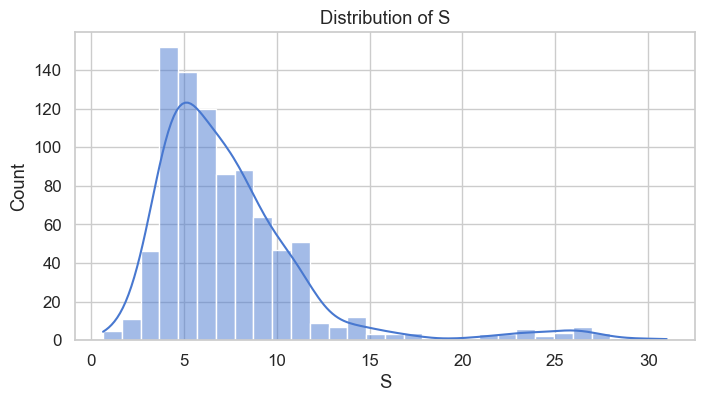

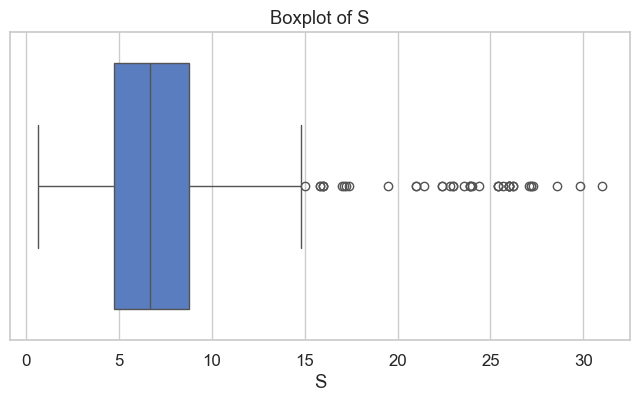

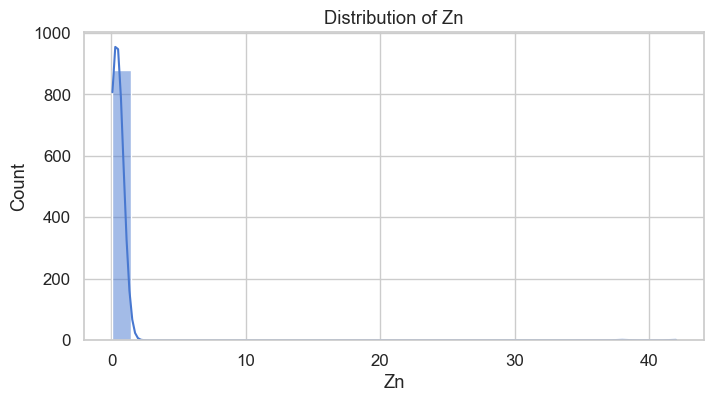

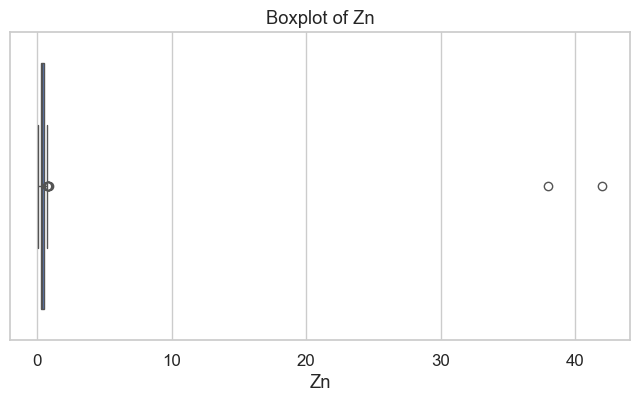

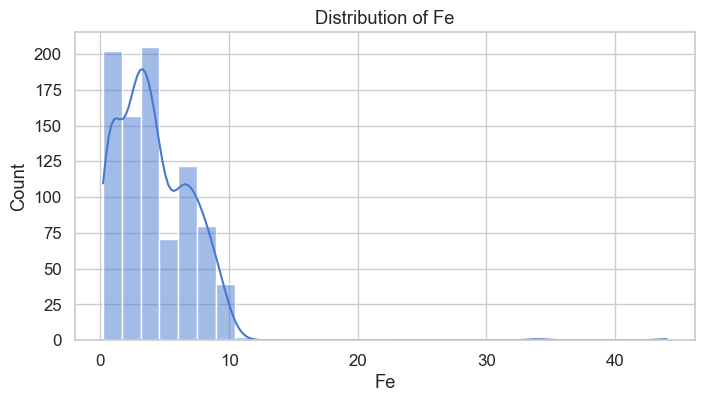

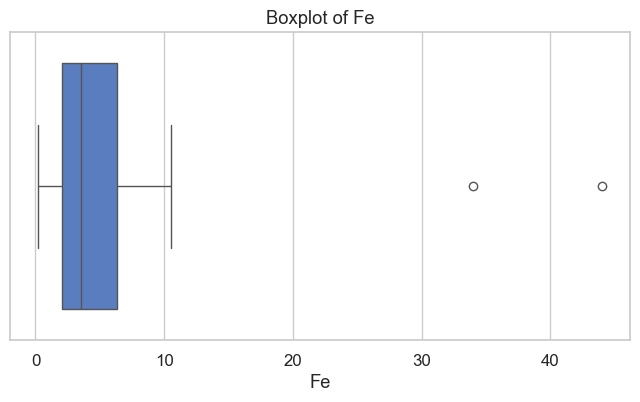

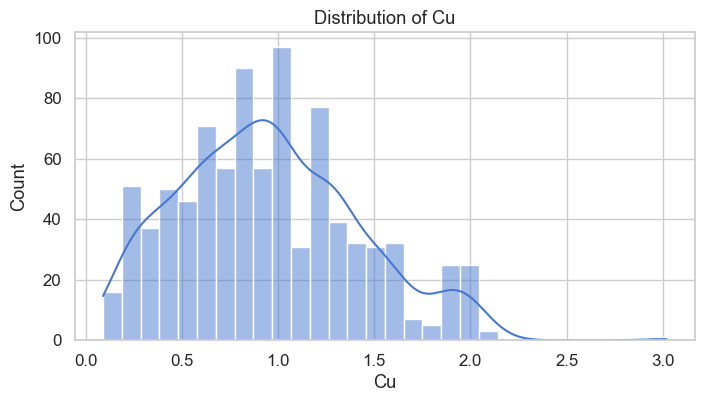

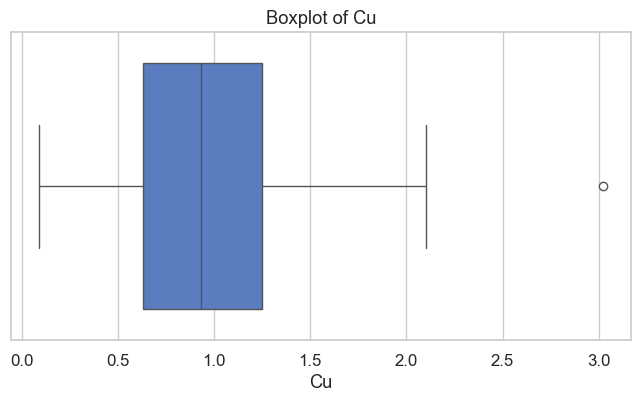

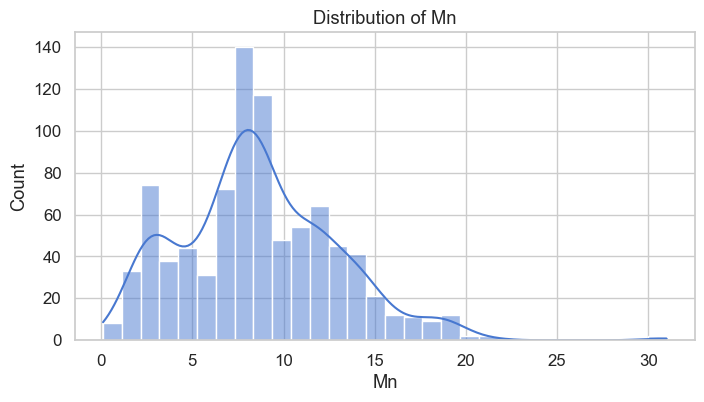

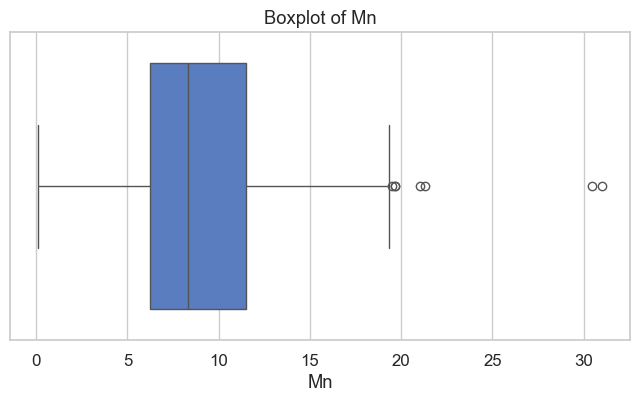

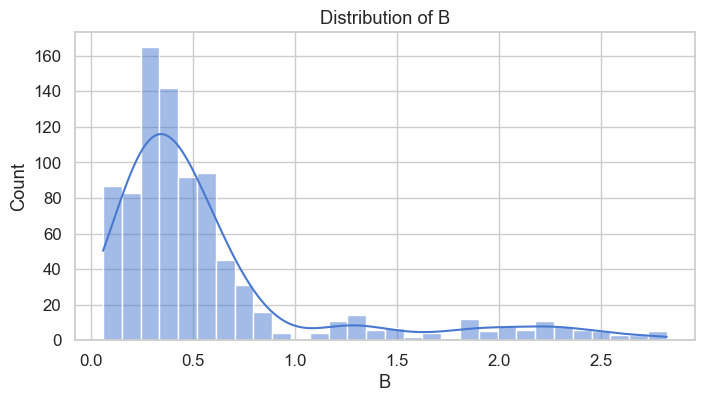

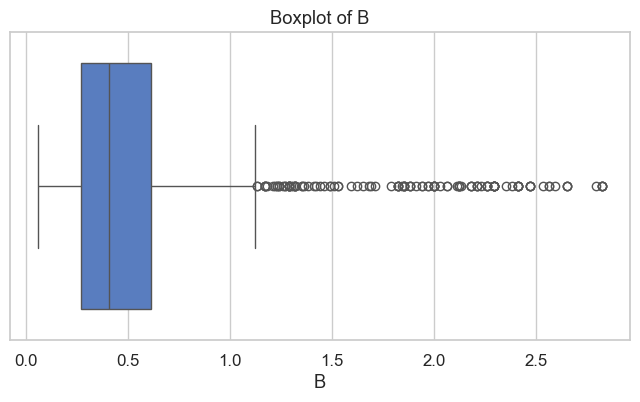

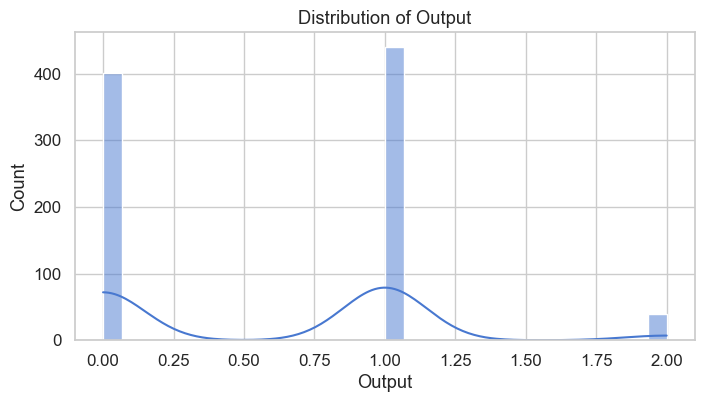

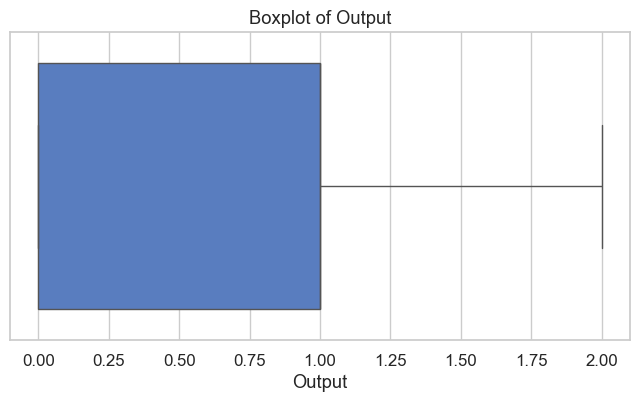

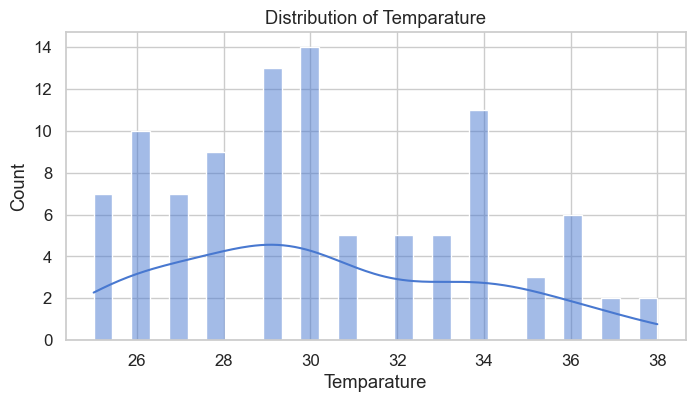

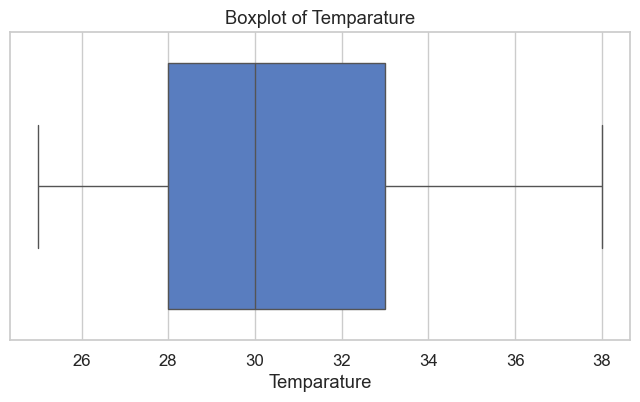

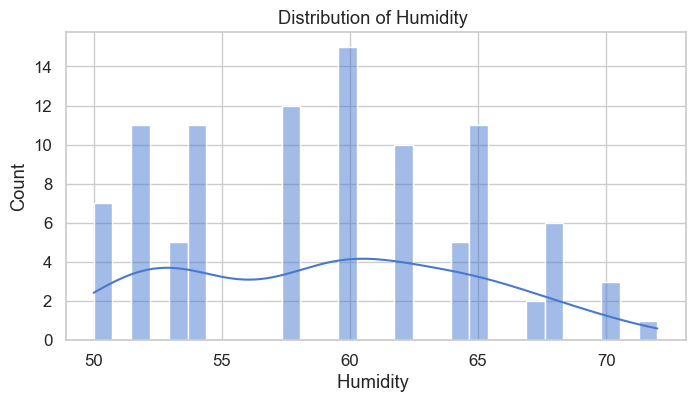

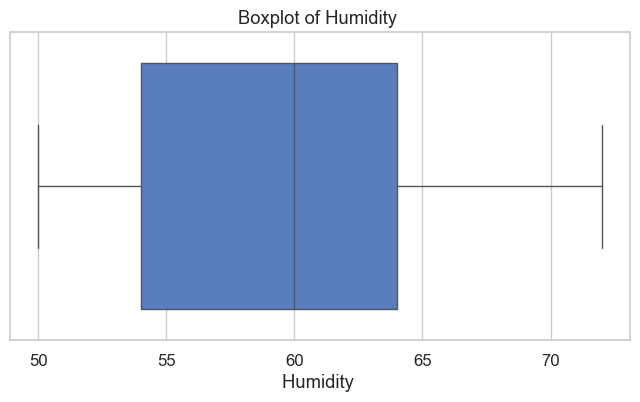

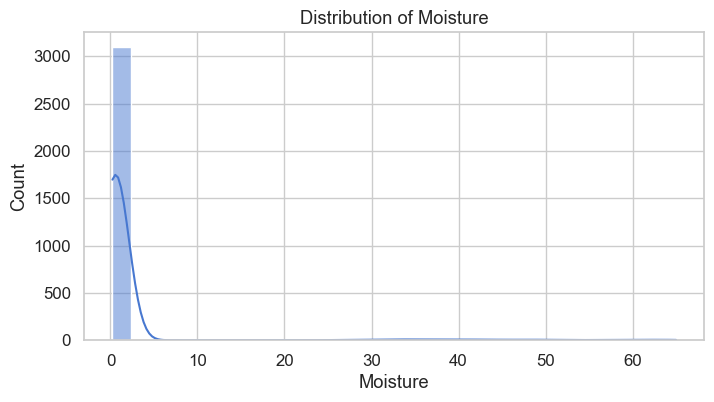

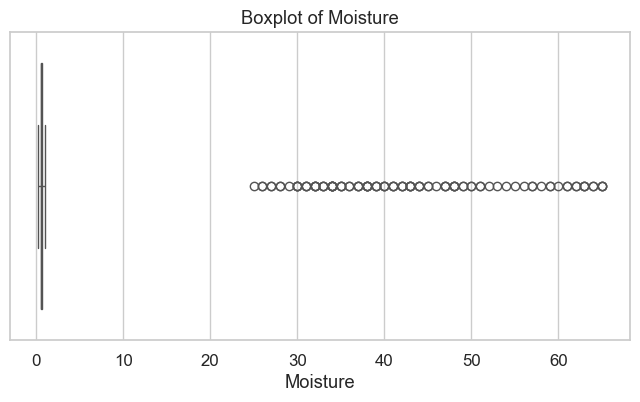

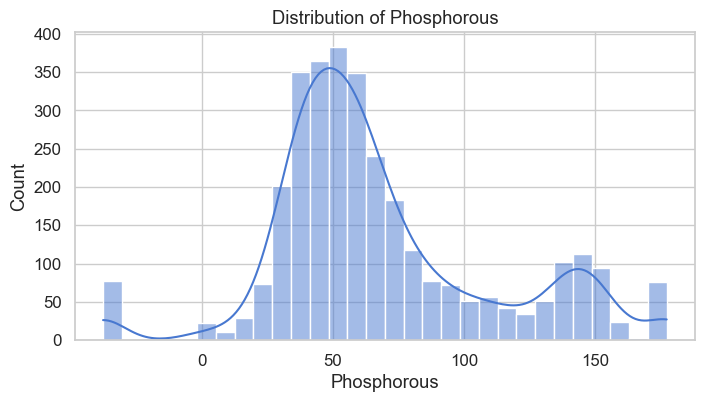

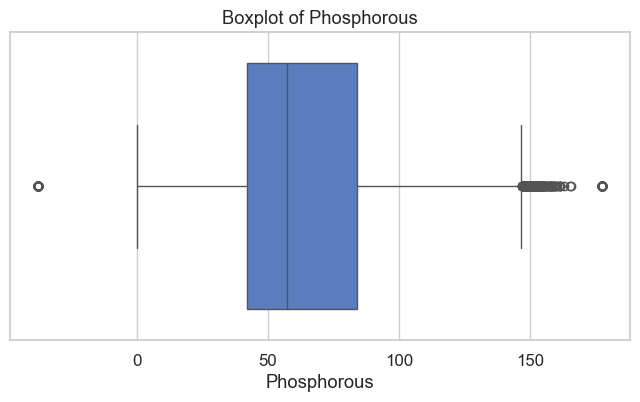

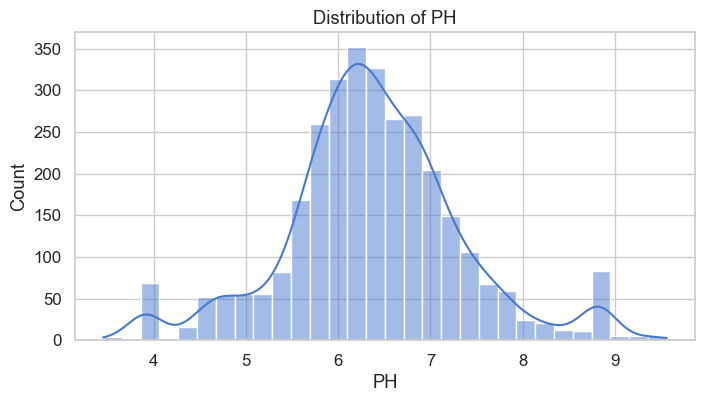

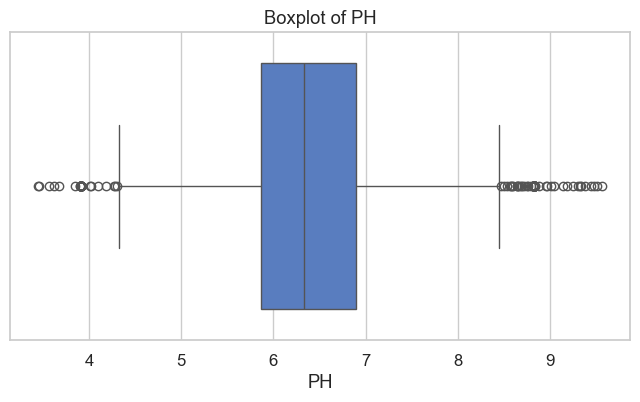

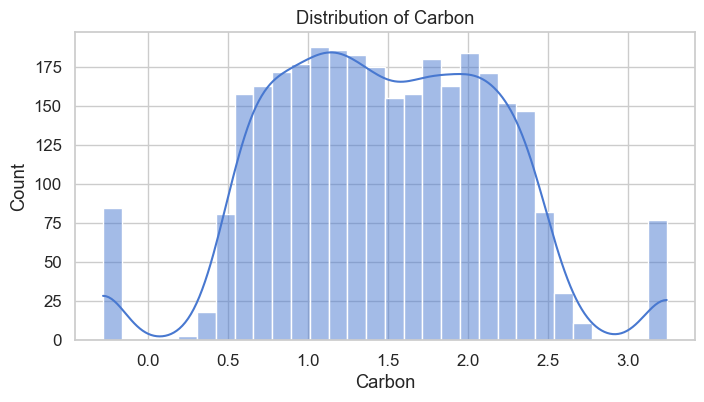

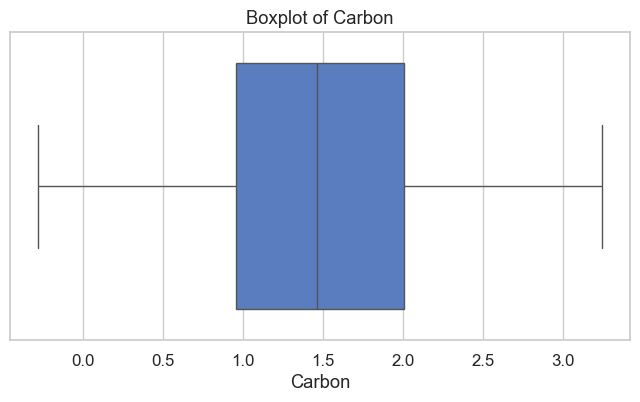

In [11]:
# =====================================================
# 4. Numeric Distributions
# =====================================================
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

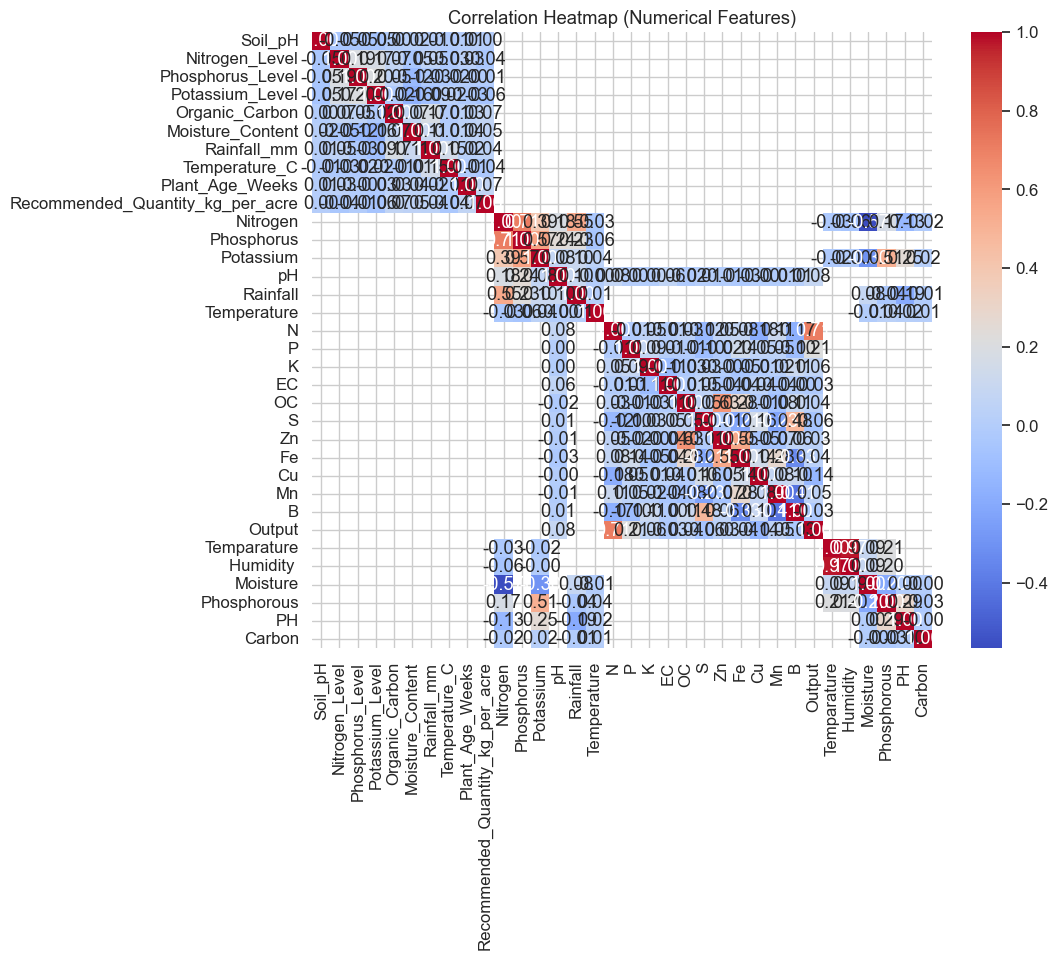

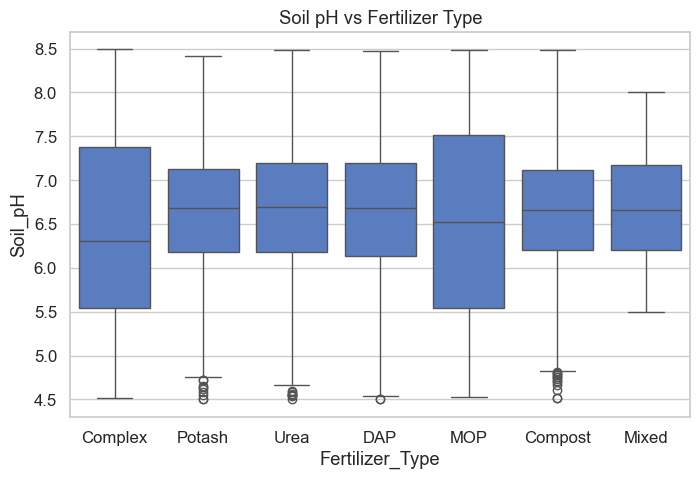

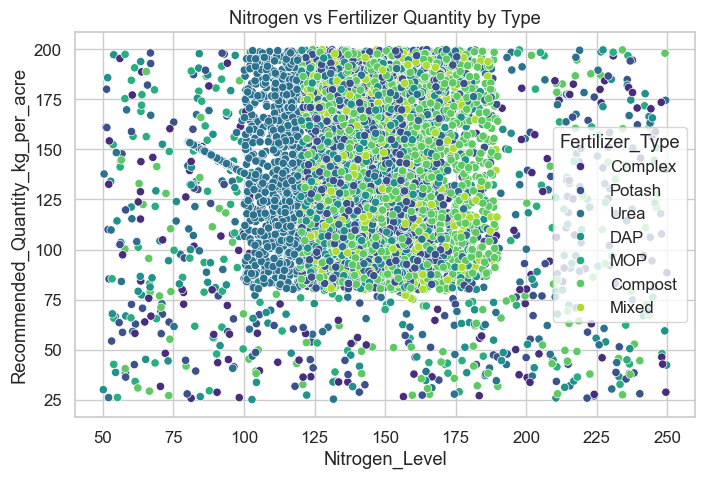

In [12]:
# =====================================================
# 5. Correlation and Feature Relationships
# =====================================================
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap (Numerical Features)')
    plt.show()

# Example: pH vs Fertilizer Type
if {'Fertilizer_Type', 'Soil_pH'}.issubset(df.columns):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Fertilizer_Type', y='Soil_pH')
    plt.title('Soil pH vs Fertilizer Type')
    plt.show()

# Example: Nitrogen vs Fertilizer Quantity by Type
if {'Nitrogen_Level', 'Recommended_Quantity_kg_per_acre', 'Fertilizer_Type'}.issubset(df.columns):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=df,
        x='Nitrogen_Level',
        y='Recommended_Quantity_kg_per_acre',
        hue='Fertilizer_Type',
        palette='viridis'
    )
    plt.title('Nitrogen vs Fertilizer Quantity by Type')
    plt.show()

In [13]:
# =====================================================
# 6. Observations
# =====================================================
print("\n🔍 Key Observations:")
print("- Check if soil pH clusters around neutral for certain fertilizer types.")
print("- Observe which nutrient (N, P, K) correlates most with fertilizer choice.")
print("- Note any extreme outliers in rainfall or nutrient levels that may need capping.")
print("- Examine feature correlations to decide which variables might be redundant.")


🔍 Key Observations:
- Check if soil pH clusters around neutral for certain fertilizer types.
- Observe which nutrient (N, P, K) correlates most with fertilizer choice.
- Note any extreme outliers in rainfall or nutrient levels that may need capping.
- Examine feature correlations to decide which variables might be redundant.


In [15]:
# =====================================================
# 7. Save Combined Dataset (Optional)
# =====================================================
PROCESSED_DIR = Path('../data/processed')
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
combined_path = PROCESSED_DIR / 'combined_raw_dataset.csv'
df.to_csv(combined_path, index=False)
print(f"\n✅ Combined dataset saved at: {combined_path.resolve()}")


✅ Combined dataset saved at: C:\Users\sasik\OneDrive\Desktop\AIML Project\data\processed\combined_raw_dataset.csv
